## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

Read the .csv file and store it in a Pandas dataframe

In [110]:
df = pd.read_csv("QueryResults.csv", names=['DATE', 'TAG', 'POSTS']).dropna()

Examine the first 5 rows and the last 5 rows of the of the dataframe

In [111]:
df.head()

,DATE,TAG,POSTS
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,ruby,70.0
3,2008-08-01 00:00:00,perl,28.0
4,2008-08-01 00:00:00,python,119.0
5,2008-08-01 00:00:00,delphi,13.0


In [112]:
df.tail()

,DATE,TAG,POSTS
2617,2024-04-01 00:00:00,go,363.0
2618,2024-04-01 00:00:00,r,1657.0
2619,2024-04-01 00:00:00,delphi,112.0
2620,2024-04-01 00:00:00,php,1487.0
2621,2024-04-01 00:00:00,ruby,124.0


Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [113]:
df.shape

(2621, 3)

Count the number of entries in each column of the dataframe

In [114]:
df.count()

DATE     2621
TAG      2621
POSTS    2621
dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [115]:
# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,TAG,POSTS
1,2008-07-01,c#,3.0
2,2008-08-01,ruby,70.0
3,2008-08-01,perl,28.0
4,2008-08-01,python,119.0
5,2008-08-01,delphi,13.0


Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [116]:
top_searched_languages = df.groupby("TAG").sum("POSTS")
top_searched_languages.sort_values("POSTS", ascending=False)

,POSTS
TAG,
javascript,2529059.0
python,2194524.0
java,1917704.0
c#,1616186.0
php,1464810.0
c++,807228.0
r,506190.0
c,404310.0
swift,333610.0


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

How many months of data exist per language? Which language had the fewest months with an entry? 

In [117]:
top_searched_languages_per_month = df.groupby(["TAG", "DATE"]).sum("POSTS")
top_searched_languages_per_month.sort_values("POSTS")

POSTS
TAG        DATE               
swift      2009-01-01      1.0
           2009-02-01      1.0
r          2008-11-01      1.0
swift      2011-05-01      1.0
           2010-11-01      1.0
...                        ...
javascript 2016-03-01  24073.0
python     2020-07-01  26233.0
           2020-06-01  27044.0
           2020-04-01  27563.0
           2020-05-01  29372.0

[2621 rows x 1 columns]

## Data Manipulation



In [118]:
# Create a pivot table
pt = df.pivot(index="DATE", columns="TAG", values="POSTS")

In [119]:
# Fill NaN values with 0
pt.fillna(0, inplace=True)

In [120]:
# check if still NaN values
pt.isna().values.any()

False

What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [121]:
pt.shape

(190, 14)

In [122]:
pt.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [123]:
pt.head

<bound method NDFrame.head of TAG         assembly      c      c#     c++  delphi     go    java  \
DATE                                                                 
2008-07-01       0.0    0.0     3.0     0.0     0.0    0.0     0.0   
2008-08-01       8.0   83.0   503.0   164.0    13.0    0.0   222.0   
2008-09-01      28.0  320.0  1639.0   755.0   104.0    0.0  1129.0   
2008-10-01      16.0  303.0  1987.0   807.0   112.0    0.0  1148.0   
2008-11-01      16.0  258.0  1729.0   734.0   140.0    0.0   954.0   
...              ...    ...     ...     ...     ...    ...     ...   
2023-12-01     180.0  870.0  2639.0  1422.0    75.0  327.0  2530.0   
2024-01-01     176.0  824.0  2680.0  1577.0    89.0  345.0  2860.0   
2024-02-01     133.0  772.0  2703.0  1442.0   110.0  305.0  2785.0   
2024-03-01     138.0  743.0  2602.0  1353.0    99.0  330.0  2846.0   
2024-04-01     215.0  826.0  3035.0  1608.0   112.0  363.0  3240.0   

TAG         javascript   perl     php  python       r   rub

In [124]:
pt.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2023-12-01,180.0,870.0,2639.0,1422.0,75.0,327.0,2530.0,4745.0,53.0,1202.0,6976.0,1602.0,154.0,738.0
2024-01-01,176.0,824.0,2680.0,1577.0,89.0,345.0,2860.0,5110.0,34.0,1390.0,7729.0,1803.0,163.0,864.0
2024-02-01,133.0,772.0,2703.0,1442.0,110.0,305.0,2785.0,4747.0,36.0,1300.0,7823.0,1825.0,157.0,668.0
2024-03-01,138.0,743.0,2602.0,1353.0,99.0,330.0,2846.0,4758.0,47.0,1378.0,7415.0,1695.0,139.0,727.0
2024-04-01,215.0,826.0,3035.0,1608.0,112.0,363.0,3240.0,4958.0,31.0,1487.0,8525.0,1657.0,124.0,813.0


Count the number of entries per programming language. Why might the number of entries be different? 

In [125]:
pt.count()

TAG
assembly      190
c             190
c#            190
c++           190
delphi        190
go            190
java          190
javascript    190
perl          190
php           190
python        190
r             190
ruby          190
swift         190
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

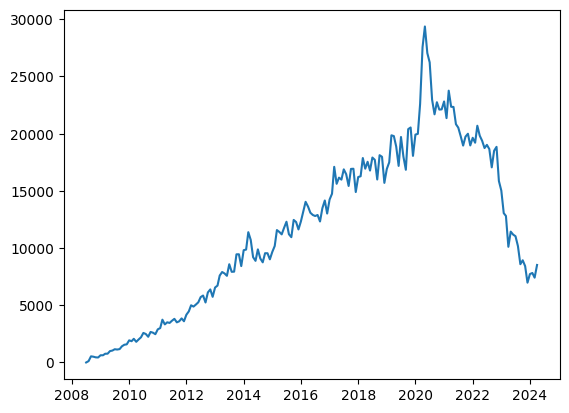

In [126]:
# plot the most popular language over years
plt.plot(pt.index, pt["python"])

## Styling the Chart

Let's look at a couple of methods that will help us style our chart:

- .figure() - allows us to resize our chart

- .xticks() - configures our x-axis

- .yticks() - configures our y-axis

- .xlabel() - add text to the x-axis

- .ylabel() - add text to the y-axis

- .ylim() - allows us to set a lower and upper bound



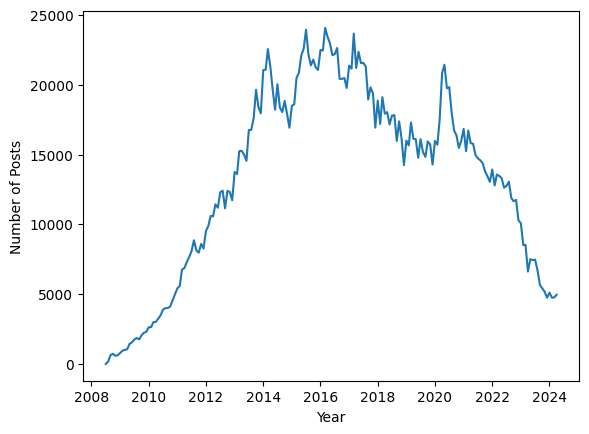

In [127]:
plt.xlabel("Year")
plt.ylabel("Number of Posts")

plt.plot(pt.index, pt["javascript"])

Show two line (e.g. for JavaScript and Python) on the same chart.

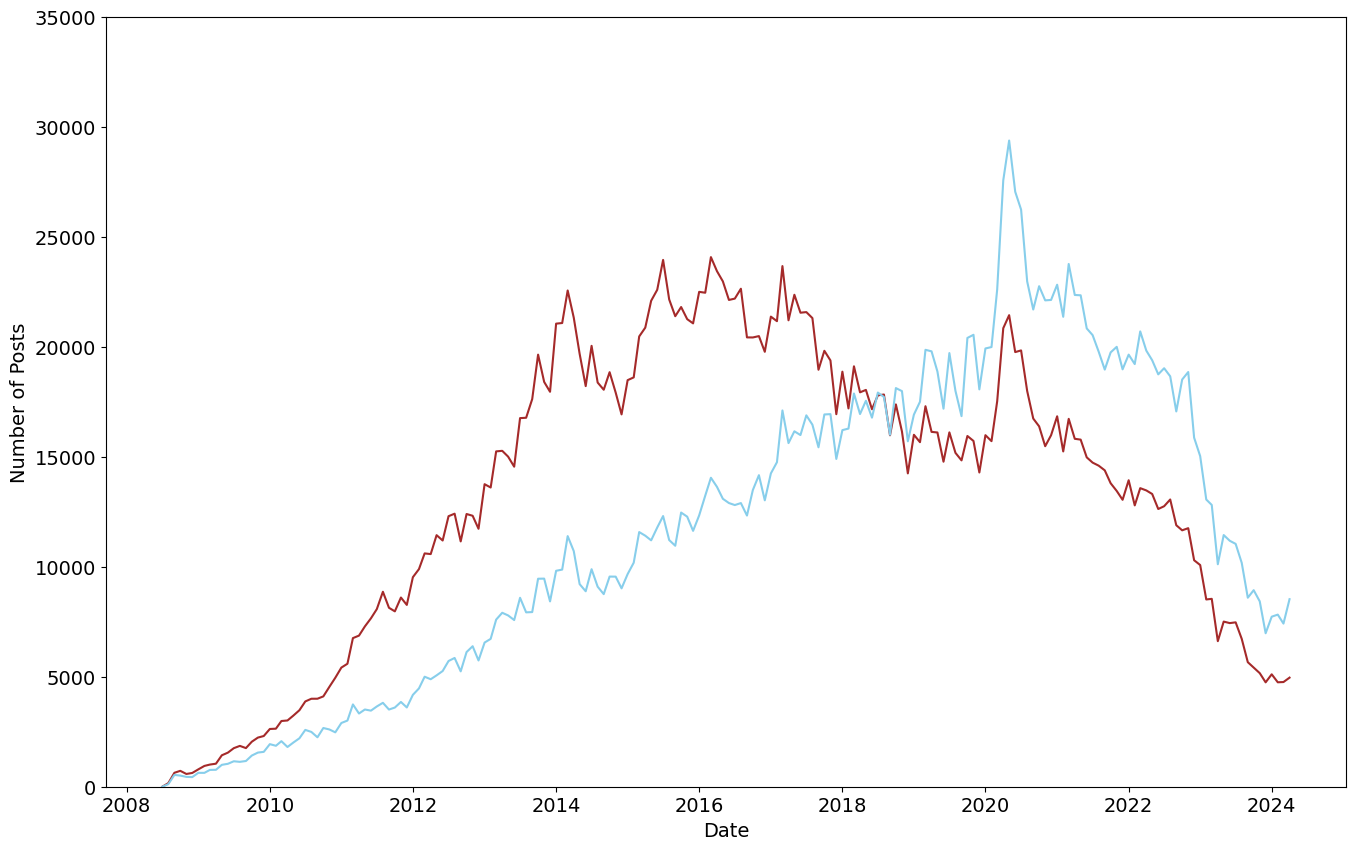

In [129]:
# plot both JavaScript and Python next to each other
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(pt.index, pt["javascript"], color="brown")
plt.plot(pt.index, pt["python"], color="skyblue")

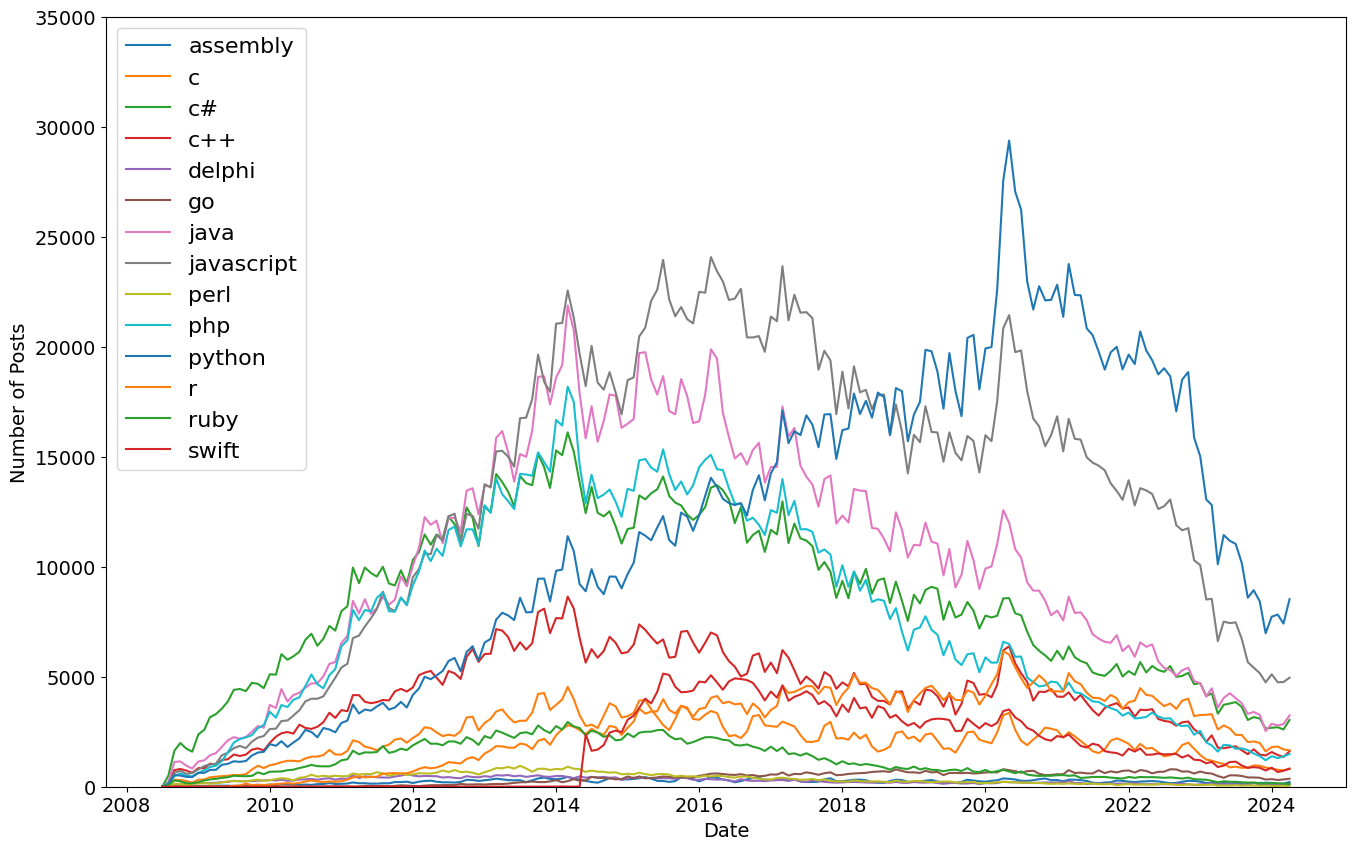

In [133]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for col in pt.columns:
    plt.plot(pt.index, pt[col], label=pt[col].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 